
## 문제.
전처리 필요.(컬럼 순서와 수 확인)
데이터 분석
조별로 하나의 지역을 선택
시간대 별 교통하고 사망자 현황, 요일 별 교통하고 사망자 현황, 교통사고 지역구별 사망자 현황 차트 시각화
지도를 활용한 교통사고 현황 분석
사망 사고 위치에 CircleMarker 표출
CircleMarker 사이즈 사망자수 + 경상자수 설정 -> 클릭하면 popup으로 정보(사고유형) 나타나도록 구현
지도 시각화는 .html 파일로 저장하여 시연

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 63.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import koreanize_matplotlib

import folium
import seaborn as sns

## 1)데이터 준비하기

1.   데이터 다운로드:https://www.data.go.kr/data/15070340/fileData.do
# 2.   /content/도로교통공단_사망 교통사고 정보_20211231.csv

In [ ]:
df = pd.read_csv("/content/도로교통공단_사망 교통사고 정보_20211231.csv", encoding =" EUC-KR" )
df

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00,주,금,1,0,0,0,0,경북,...,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434
2812,2021,2021-12-31 17:00,주,금,1,0,0,0,0,제주,...,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699
2813,2021,2021-12-31 18:00,야,금,1,0,0,0,0,강원,...,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465
2814,2021,2021-12-31 19:00,야,금,1,0,0,0,0,경북,...,횡단중,보행자 보호의무 위반,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521


##2)데이터 전처리
주어진 CSV 파일에서 '발생년월일시' 열의 값에서 공백 뒤의 값을 추출하여 '발생시간'이라는 새로운 칼럼을 생성하고, 해당 칼럼에 int 형태로 값을 넣어주는 방법

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   발생년          2816 non-null   int64  
 1   발생년월일시       2816 non-null   object 
 2   주야           2816 non-null   object 
 3   요일           2816 non-null   object 
 4   사망자수         2816 non-null   int64  
 5   부상자수         2816 non-null   int64  
 6   중상자수         2816 non-null   int64  
 7   경상자수         2816 non-null   int64  
 8   부상신고자수       2816 non-null   int64  
 9   발생지시도        2816 non-null   object 
 10  발생지시군구       2816 non-null   object 
 11  사고유형_대분류     2816 non-null   object 
 12  사고유형_중분류     2816 non-null   object 
 13  사고유형         2816 non-null   object 
 14  가해자법규위반      2816 non-null   object 
 15  도로형태_대분류     2816 non-null   object 
 16  도로형태         2816 non-null   object 
 17  가해자_당사자종별    2816 non-null   object 
 18  피해자_당사자종별    2816 non-null   object 
 19  발생위치X(

In [ ]:
# '발생년월일시'에서 발생년월과 발생시간을 추출하여 새로운 컬럼 생성
df['발생년월일'] = df['발생년월일시'].str.split(' ').str[0]
df['발생시간'] = df['발생년월일시'].str.split(' ').str[1].str.split(':').str[0].astype(int)

# 컬럼 순서 변경
df = df[['발생년', '발생년월일', '발생시간', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)', '발생위치Y(UTMK)', '경도', '위도']]

# 결과 출력
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   발생년          2816 non-null   int64  
 1   발생년월일        2816 non-null   object 
 2   발생시간         2816 non-null   int64  
 3   주야           2816 non-null   object 
 4   요일           2816 non-null   object 
 5   사망자수         2816 non-null   int64  
 6   부상자수         2816 non-null   int64  
 7   중상자수         2816 non-null   int64  
 8   경상자수         2816 non-null   int64  
 9   부상신고자수       2816 non-null   int64  
 10  발생지시도        2816 non-null   object 
 11  발생지시군구       2816 non-null   object 
 12  사고유형_대분류     2816 non-null   object 
 13  사고유형_중분류     2816 non-null   object 
 14  사고유형         2816 non-null   object 
 15  가해자법규위반      2816 non-null   object 
 16  도로형태_대분류     2816 non-null   object 
 17  도로형태         2816 non-null   object 
 18  가해자_당사자종별    2816 non-null   object 
 19  피해자_당사

###데이터전처리 주석

1.발생년월일시 컬럼에서 공백을 기준으로 분할하여 발생년월일과 발생시간 컬럼을 생성합니다.
str.split(' ')을 사용하여 공백을 기준으로 분할합니다.
str[0]을 사용하여 분할된 결과에서 첫 번째 요소인 발생년월을 선택하여 발생년월일 컬럼에 저장합니다.
str.split(':').str[0]을 사용하여 발생시간에서 시간 부분을 추출합니다.
astype(int)를 사용하여 추출한 시간을 정수형으로 변환하여 발생시간 컬럼에 저장합니다.

2.컬럼 순서를 변경하여 '발생년', '발생년월일', '발생시간'이 먼저 나오도록 합니다.
df[['발생년', '발생년월일', '발생시간', ...]]을 사용하여 컬럼 순서를 조정합니다.

 '발생년월일시'에서 발생년월과 발생시간을 추출하여 새로운 컬럼 생성

df['발생년월일'] = pd.to_datetime(df['발생년월일시']).dt.date
df['발생시간'] = pd.to_datetime(df['발생년월일시']).dt.strftime('%H:%M').astype(str)

컬럼 순서 변경

df = df[['발생년', '발생년월일', '발생시간', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)', '발생위치Y(UTMK)', '경도', '위도']]

결과 출력

print(df.info())


발생년월일 의 datatype이 바뀌지 않음.

## 3) 데이터 분석
- 조별로 하나의 지역을 선택 : 2조 대구
- 시간대 별 교통하고 사망자 현황, 요일 별 교통하고 사망자 현황, 교통사고 지역구별 사망자 현황 차트 시각화
- 지도를 활용한 교통사고 현황 분석
 * 사망 사고 위치에 CircleMarker 표출
 * CircleMarker 사이즈 사망자수 + 경상자수 설정 -> 클릭하면 popup으로 정보(사고유형) 나타나도록 구현
 * 지도 시각화는 .html 파일로 저장하여 시연

###  지역선택: 대구

In [ ]:
dg_df = df[df['발생지시도'] == '대구']
dg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 46 to 2754
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   발생년          81 non-null     int64  
 1   발생년월일        81 non-null     object 
 2   발생시간         81 non-null     int64  
 3   주야           81 non-null     object 
 4   요일           81 non-null     object 
 5   사망자수         81 non-null     int64  
 6   부상자수         81 non-null     int64  
 7   중상자수         81 non-null     int64  
 8   경상자수         81 non-null     int64  
 9   부상신고자수       81 non-null     int64  
 10  발생지시도        81 non-null     object 
 11  발생지시군구       81 non-null     object 
 12  사고유형_대분류     81 non-null     object 
 13  사고유형_중분류     81 non-null     object 
 14  사고유형         81 non-null     object 
 15  가해자법규위반      81 non-null     object 
 16  도로형태_대분류     81 non-null     object 
 17  도로형태         81 non-null     object 
 18  가해자_당사자종별    81 non-null     object 
 19  피해자_당사자

### 3-1  )시간대 별 교통사고 사망자 현황, 요일 별 교통하고 사망자 현황, 교통사고 지역구별 사망자 현황 차트 시각화

In [ ]:
#1. 시간대별

fig = px.bar(dg_df, x='사망자수', y='발생시간', orientation='h')

fig.show()

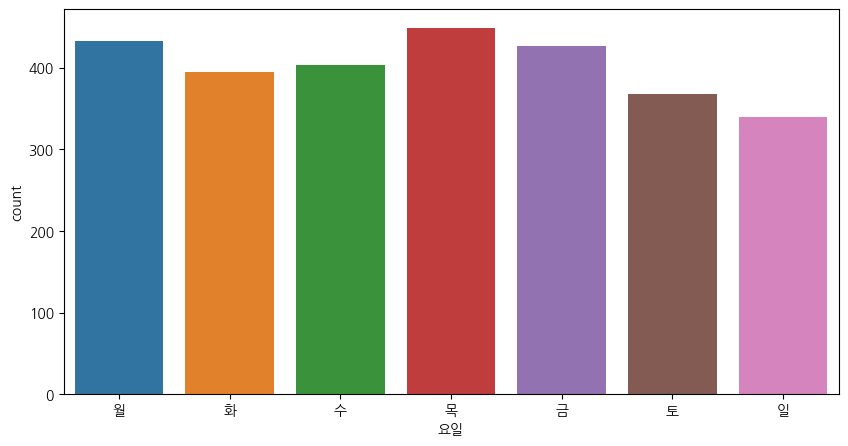

In [ ]:
# 요일별

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='요일', order = ['월','화','수','목','금','토','일'])
plt.show()

#발생기준이 다름

In [ ]:
fig = px.bar(dg_df, x='사망자수', y='요일', orientation='h')

fig.show()

In [ ]:
#3. 지역구별

fig = px.bar(dg_df, x='사망자수', y='발생지시군구', orientation='h')

fig.show()

### 3-2)사망 사고 위치에 CircleMarker 표출

In [ ]:
#) 지도 불러오기

import folium

map = folium.Map(location=[35.8714354,128.601445]) # 경도 /위도 순으로 .
map

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   발생년          2816 non-null   int64  
 1   발생년월일        2816 non-null   object 
 2   발생시간         2816 non-null   int64  
 3   주야           2816 non-null   object 
 4   요일           2816 non-null   object 
 5   사망자수         2816 non-null   int64  
 6   부상자수         2816 non-null   int64  
 7   중상자수         2816 non-null   int64  
 8   경상자수         2816 non-null   int64  
 9   부상신고자수       2816 non-null   int64  
 10  발생지시도        2816 non-null   object 
 11  발생지시군구       2816 non-null   object 
 12  사고유형_대분류     2816 non-null   object 
 13  사고유형_중분류     2816 non-null   object 
 14  사고유형         2816 non-null   object 
 15  가해자법규위반      2816 non-null   object 
 16  도로형태_대분류     2816 non-null   object 
 17  도로형태         2816 non-null   object 
 18  가해자_당사자종별    2816 non-null   object 
 19  피해자_당사

In [ ]:
dg_df = dg_df.astype({'사망자수': float, '부상자수': float})
dg_df.head()

,발생년,발생년월일,발생시간,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
46,2021,2021-01-10,16,주,일,1.0,0.0,0,0,0,...,정면충돌,교차로 통행방법 위반,교차로,교차로내,승용차,이륜차,1103341.0,1763988.0,128.644665,35.867011
70,2021,2021-01-15,1,야,금,1.0,0.0,0,0,0,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,1095861.3,1763020.8,128.561712,35.859052
160,2021,2021-01-26,15,주,화,1.0,0.0,0,0,0,...,횡단중,보행자 보호의무 위반,교차로,교차로횡단보도내,건설기계,보행자,1110500.0,1764604.0,128.724031,35.871782
161,2021,2021-01-26,19,야,화,1.0,0.0,0,0,0,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,1095794.0,1766369.0,128.561369,35.889242
176,2021,2021-01-29,9,주,금,1.0,0.0,0,0,0,...,횡단중,기타,단일로,기타단일로,승용차,보행자,1092689.0,1760537.0,128.526294,35.836967


### 3-3)CircleMarker 사이즈 사망자수 + 경상자수 설정 -> 클릭하면 popup으로 정보(사고유형) 나타나도록 구현

In [ ]:
# 1. 지도 준비
map = folium.Map(location=[35.8714354,128.601445])

# 2) CircleMaker 지도에 표출 -> for 문을 이용해서 dj_df 데이터가 있을 때까지 CircleMarker를 지도에 추가
for n in dg_df.index:
    # 써클마커 사이즈
    cnt = dg_df['사망자수'][n] + dg_df['부상자수'][n]
    # 위도 경도 추출
    lat = dg_df['위도'][n]
    lng = dg_df['경도'][n]

    # CircleMarker를 지도에 추가
    folium.CircleMarker([lat, lng], radius=cnt * 10, popup=dg_df['사고유형'][n],
                        color='#F70000', fill_color='#F70000').add_to(map)

map

In [ ]:
import webbrowser

file_path = '/content/20211231 대구 사망 교통사고 데이터 분석. html'

webbrowser.open(file_path)

False